<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/dev_dataAnalysis/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import cv2
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

print(device_name)

/device:GPU:0


In [3]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-04-10 02:06:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   159MB/s    in 0.4s    

2023-04-10 02:06:27 (159 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# 압축해제
with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as z:
    z.extractall()

In [13]:
# 이 폴더 안에 파일 목록 보여줘 .listdir / len 이용해서 파일 수 확인 
print(len(os.listdir('/content/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/content/cats_and_dogs_filtered/train/dogs')))

print(len(os.listdir('/content/cats_and_dogs_filtered/validation/cats')))
print(len(os.listdir('/content/cats_and_dogs_filtered/validation/dogs')))

1000
1000
500
500


train data -> 1000개
validation data -> 300개
test data -> 200개

In [14]:
#현재 디렉토리 확인
print(os.getcwd())

# 새로운 폴더에 파일 옮기기 / 이 경로를 합쳐줘~
root_dir = os.path.join(os.getcwd(), 'dogs_cats')
print(root_dir)
#현재 디렉토리에 dog_cats 폴더 생성
os.mkdir(root_dir)

#현재 디렉토리 변경
os.chdir(root_dir)
print(os.getcwd())

/content
/content/dogs_cats


FileExistsError: ignored

In [ ]:
#train용 폴더 생성
train_set_dir = os.path.join(root_dir, 'train_set')
print(train_set_dir)
os.mkdir(train_set_dir)

train_dog_dir = os.path.join(train_set_dir, 'dog')
print(train_dog_dir)
os.mkdir(train_dog_dir)

train_cat_dir = os.path.join(train_set_dir, 'cat')
print(train_cat_dir)
os.mkdir(train_cat_dir)

In [ ]:
#valid용 폴더 생성
valid_set_dir = os.path.join(root_dir, 'valid_set')
print(valid_set_dir)
os.mkdir(valid_set_dir)

valid_dog_dir = os.path.join(valid_set_dir, 'dog')
print(valid_dog_dir)
os.mkdir(valid_dog_dir)

valid_cat_dir = os.path.join(valid_set_dir, 'cat')
print(valid_cat_dir)
os.mkdir(valid_cat_dir)

In [ ]:
#test용 폴더 생성
test_set_dir = os.path.join(root_dir, 'test_set')
print(test_set_dir)
os.mkdir(test_set_dir)


test_dog_dir = os.path.join(test_set_dir, 'dog')
print(test_dog_dir)
os.mkdir(test_dog_dir)

test_cat_dir = os.path.join(test_set_dir, 'cat')
print(test_cat_dir)
os.mkdir(test_cat_dir)

In [15]:
# image file name list 생성 0~2499.jpg 까지 만들어 놓고
dog_files = [f'dog.{i}.jpg' for i in range(2500)]
cat_files = [f'cat.{i}.jpg' for i in range(2500)]

In [16]:
# 각 폴더로 image 이동
for file in dog_files[:1000]:
    src = os.path.join('/content/cats_and_dogs_filtered/train/dogs', file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)

for file in cat_files[:1000]:
    src = os.path.join('/content/cats_and_dogs_filtered/train/cats', file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)

NameError: ignored

In [17]:
print(len(os.listdir(train_dog_dir)))
print(len(os.listdir(train_cat_dir)))

NameError: ignored

In [ ]:
for file in dog_files[2000:2300]:
    src = os.path.join('/content/cats_and_dogs_filtered/validation/dogs', file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)

for file in cat_files[2000:2300]:
    src = os.path.join('/content/cats_and_dogs_filtered/validation/cats', file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)

In [ ]:
print(len(os.listdir(valid_dog_dir)))
print(len(os.listdir(valid_cat_dir)))

In [ ]:
for file in dog_files[2300:2500]:
    src = os.path.join('/content/cats_and_dogs_filtered/validation/dogs', file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)

for file in cat_files[2300:2500]:
    src = os.path.join('/content/cats_and_dogs_filtered/validation/cats', file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [ ]:
print(len(os.listdir(test_dog_dir)))
print(len(os.listdir(test_cat_dir)))

In [ ]:
print(f'the number of train set : {len(os.listdir(train_dog_dir)) + len(os.listdir(train_cat_dir))}')
print(f'the number of validn set : {len(os.listdir(valid_dog_dir)) + len(os.listdir(valid_cat_dir))}')
print(f'the number of test set : {len(os.listdir(test_dog_dir)) + len(os.listdir(test_cat_dir))}')



*   rotation_range - 사진 회전각도 범위; 0~180사이값
*   width_shift_range, height_shift_range - 수평과 수직으로 평행 이동시킬 범위; 전체 너비와 높이에 대한 비율값
*   shear_range - shearing transformation(전단 변환)을 적용할 각도 범위; 사진을 3D로 기울임
*   zoom_range - 사진을 확대할 범위
*   horizontal_flip - 랜덤하게 이미지를 수평으로 뒤집음
*   fill_mode - 회전이나 이동을 통해 빈 곳이 생기면 픽셀을 채우는 방법(nearest는 인접한 픽셀을 사용함)


In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                      rotation_range=40,
                                                      width_shift_range=0.2,
                                                       height_shift_range=0.2,
                                                       shear_range=0.2,
                                                       zoom_range=0.2,
                                                       horizontal_flip=True,
                                                       fill_mode='nearest')

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                   target_size=(150,150),
                                                   batch_size=32)
valid_generator = valid_datagen.flow_from_directory(valid_set_dir,
                                                   target_size=(150,150),
                                                   batch_size=32)
test_generator = test_datagen.flow_from_directory(test_set_dir,
                                                 target_size=(150,150),
                                                 batch_size=32)



In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=False,
                                         input_shape=(150,150,3))

#base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax') # 개, 고양이 분류만 진행 finetuning Dense 2
])

model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
             loss='categorical_crossentropy',
              metrics=['acc'])

earlystopping = EarlyStopping(monitor='val_loss', patience=5)                     


hist = model.fit_generator(train_generator,
                   epochs=5,
                   validation_data=valid_generator,
                   callbacks=[earlystopping])

<ipython-input-20-c5cf9ce07119>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,


Epoch 1/5
63/63 [==============================] - 37s 370ms/step - loss: 0.6552 - acc: 0.6105 - val_loss: 0.5660 - val_acc: 0.7217
Epoch 2/5
63/63 [==============================] - 20s 310ms/step - loss: 0.5959 - acc: 0.6810 - val_loss: 0.4892 - val_acc: 0.8033
Epoch 3/5
63/63 [==============================] - 21s 325ms/step - loss: 0.5568 - acc: 0.7220 - val_loss: 0.4464 - val_acc: 0.8183
Epoch 4/5
63/63 [==============================] - 19s 299ms/step - loss: 0.5107 - acc: 0.7630 - val_loss: 0.4114 - val_acc: 0.8233
Epoch 5/5
63/63 [==============================] - 20s 322ms/step - loss: 0.4958 - acc: 0.7675 - val_loss: 0.3779 - val_acc: 0.8450


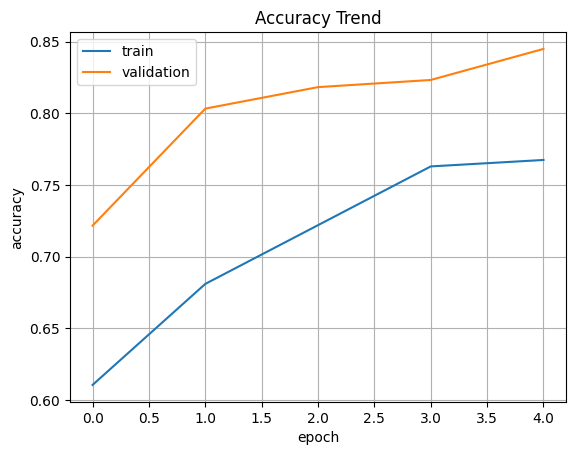

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

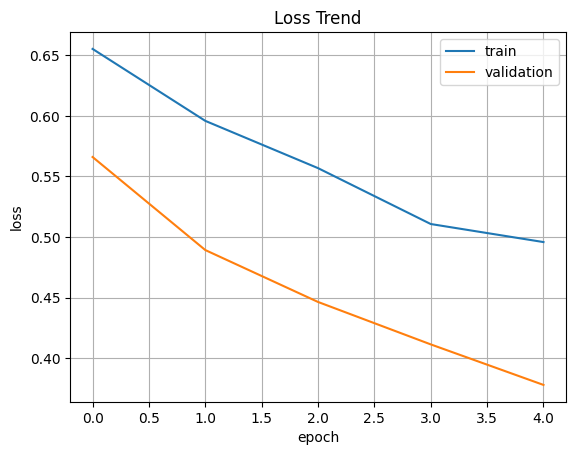

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
model.save('model.h5')

test_loss, test_acc = model.evaluate_generator(test_generator,
                                               workers=4)
print(f'test loss : {test_loss:.4f} / test acc : {test_acc*100:.2f} %')

### 특징 추출기 일부 학습

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet',
                                         include_top=False,
                                         input_shape=(150,150,3))

trainable = False
for layer in base_model.layers:
    if layer.name == 'block5_conv3':
        trainable = True
    layer.trainable =  trainable

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
             loss='categorical_crossentropy',
              metrics=['acc'])

earlystopping = EarlyStopping(monitor='val_loss', patience=5)                     


hist = model.fit_generator(train_generator,
                   epochs=5,
                   validation_data=valid_generator,
                   callbacks=[earlystopping])

<ipython-input-37-2f64f97a4f35>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,


Epoch 1/5
63/63 [==============================] - 24s 309ms/step - loss: 0.6595 - acc: 0.6070 - val_loss: 0.5801 - val_acc: 0.7350
Epoch 2/5
63/63 [==============================] - 22s 350ms/step - loss: 0.5839 - acc: 0.6985 - val_loss: 0.4707 - val_acc: 0.8083
Epoch 3/5
63/63 [==============================] - 19s 302ms/step - loss: 0.5138 - acc: 0.7585 - val_loss: 0.4020 - val_acc: 0.8333
Epoch 4/5
63/63 [==============================] - 23s 359ms/step - loss: 0.4529 - acc: 0.7875 - val_loss: 0.3562 - val_acc: 0.8500
Epoch 5/5
39/63 [=================>............] - ETA: 6s - loss: 0.4223 - acc: 0.8157